# Transport Model

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# load data
transport_df = pd.read_csv('../Dataset/transport.csv')
transport_df.head()

,Category,Carbon Emission (kg CO2),Distance (km)
0,Public,47.25,192.19
1,Public,0.82,8.48
2,Public,0.37,83.23
3,Private,11.57,67.74
4,Public,54.39,221.20


In [3]:
# data preparation
data_encoded = pd.get_dummies(transport_df['Category'], prefix='', prefix_sep='')
transport_df = pd.concat([transport_df, data_encoded], axis=1)

X = transport_df[['Bike', 'Motorcycle', 'Private', 'Public', 'Walk', 'Distance (km)']]
y = transport_df['Carbon Emission (kg CO2)']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standarize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [4]:
# create model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [5]:
# compile & taining
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.3932 - mae: 0.9949 - val_loss: 1.5264 - val_mae: 0.3283
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0472 - mae: 0.5718 - val_loss: 1.4205 - val_mae: 0.2155
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6389 - mae: 0.4270 - val_loss: 1.3735 - val_mae: 0.1880
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5895 - mae: 0.3991 - val_loss: 1.3434 - val_mae: 0.1968
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4744 - mae: 0.3424 - val_loss: 1.3102 - val_mae: 0.1963
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3994 - mae: 0.3230 - val_loss: 1.2749 - val_mae: 0.1942
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3453 - mae: 0.3042 - val_loss: 1.2408 - val_mae: 0.1961
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2855 - mae: 0.2758 - val_loss: 1.2014 - val_mae: 0.1880
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.26

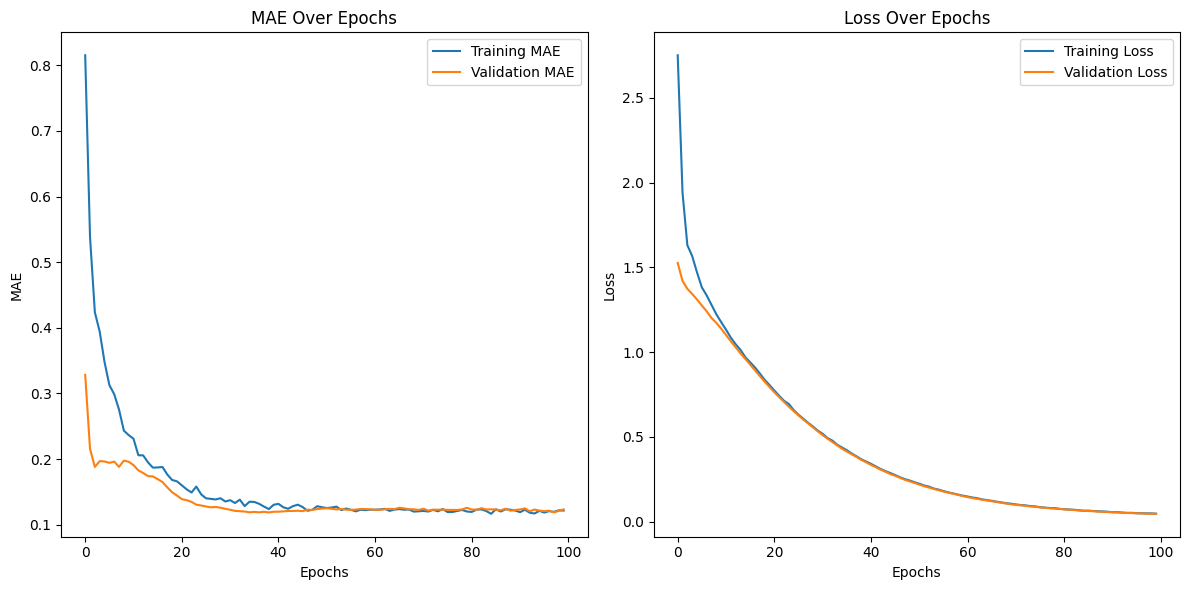

In [6]:
# subplot mae
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Over Epochs')

# subplot loss
plt.subplot(1, 2, 2)  # (jumlah baris, jumlah kolom, urutan plot)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

In [7]:
loss, mae = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Loss: {loss}")
print(f"MAE: {mae}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0485 - mae: 0.1292 
Loss: 0.045965250581502914
MAE: 0.12318162620067596


In [8]:
def predict_carbon_footprint(category, distance_km, model, scaler, scaler_y):
    categories = ['Bike', 'Motorcycle', 'Private', 'Public', 'Walk']
    
    # encode category
    category_encoded = [0, 0, 0, 0, 0]
    category_encoded[categories.index(category)] = 1
    
    input_data = category_encoded + [distance_km]
    input_df = pd.DataFrame([input_data], columns=['Bike', 'Motorcycle', 'Private', 'Public', 'Walk', 'Distance (km)'])
    input_data_scaled = scaler.transform(input_df)
    
    predicted_emission_scaled = model.predict(input_data_scaled)
    predicted_emission = scaler_y.inverse_transform(predicted_emission_scaled.reshape(-1, 1))[0][0]
    return f"Prediksi carbon footprint untuk {category} dengan jarak {distance_km} km adalah {predicted_emission:.2f} CO2 kg"

In [9]:
category_input = 'Private'
distance_input = 30

predicted_carbon_footprint = predict_carbon_footprint(category_input, distance_input, model, scaler, scaler_y)
print(predicted_carbon_footprint)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediksi carbon footprint untuk Private dengan jarak 30 km adalah 5.44 CO2 kg


In [11]:
def test_model_with_recommendations(category, distance_km, model, scaler, scaler_y):
    categories = ['Bike', 'Motorcycle', 'Private', 'Public', 'Walk']

    # validasi input kategori
    if category not in categories:
        return f"Kategori transportasi tidak valid! Pilih dari: {', '.join(categories)}", ""

    # encoding kategori dipilih
    category_encoded = [0, 0, 0, 0, 0]
    category_encoded[categories.index(category)] = 1

    # input data kategori + distance
    input_data = category_encoded + [distance_km]
    input_df = pd.DataFrame([input_data], columns=['Bike', 'Motorcycle', 'Private', 'Public', 'Walk', 'Distance (km)'])  # konversi dataframe
    input_data_scaled = scaler.transform(input_df)  # standarisasi input

    # prediksi emisi karbon dari input data
    predicted_emission = model.predict(input_data_scaled)
    predicted_emission = scaler_y.inverse_transform(predicted_emission.reshape(-1, 1))[0][0]  # Invers transform y
    transport_output = f"Transportasi {category} dengan jarak {distance_km} km menghasilkan carbon emission sebesar {predicted_emission:.2f} CO2 kg"

    # rekomendasi transportasi dengan emisi lebih rendah
    recommendations = []
    for transport in categories:
        category_encoded = [0, 0, 0, 0, 0]
        category_encoded[categories.index(transport)] = 1
        input_data = category_encoded + [distance_km]
        input_df = pd.DataFrame([input_data], columns=['Bike', 'Motorcycle', 'Private', 'Public', 'Walk', 'Distance (km)'])

        # predict CO2 of the other category
        input_data_scaled = scaler.transform(input_df)
        emission_scaled = model.predict(input_data_scaled)[0][0]
        emission = scaler_y.inverse_transform([[emission_scaled]])[0][0]

        if emission < predicted_emission:
            recommendations.append((transport, emission))

    # output rekomendasi
    if recommendations:
        recommendations.sort(key=lambda x: x[1])
        recommendations_output = f"\nRekomendasi transportasi lebih rendah dari {category} dengan jarak perjalanan {distance_km} km:\n"
        for recommendation in recommendations:
            recommendations_output += f"- {recommendation[0]}: {recommendation[1]:.2f} CO2 kg\n"
    else:
        recommendations_output = f"Tidak ada transportasi yang memiliki emisi karbon lebih rendah dari {category} dengan jarak perjalanan {distance_km} km"

    return transport_output, recommendations_output


In [12]:
category_input = 'Private'
distance_input = 30

transport_output, recommendations_output = test_model_with_recommendations(category_input, distance_input, model, scaler, scaler_y)

print(transport_output)
print(recommendations_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Transportasi Private dengan jarak 30 km menghasilkan carbon emission sebesar 5.44 CO2 kg

Rekomendasi transportasi lebih rendah dari Private dengan jarak perjalanan 30 km:
- Walk: 0.97 CO2 kg
- Bike: 1.13 CO2 kg
- Motorcycle: 4.17 CO2 kg
- Public: 4.99 CO2 kg
- Private: 5.44 CO2 kg



In [14]:
# save model
model.save('transport_model.h5')